In [1]:
from scipy.spatial.distance import pdist, squareform
from collections import defaultdict
from itertools import product

import time
import scipy
import numpy as np
import ringity as rng
import seaborn as sns
import networkx as nx
import matplotlib.pyplot as plt

# Network model explanation

## Idea - (Soft) Random Geometric Graphs

In [2]:
back_col = '#AEE3ED'
node_col = '#1A7D90'
edge_col = '#1A7D90'

In [3]:
ds = 2.4

In [47]:
N   = 2**8
rho = 0.05
eta = 0.05
a = 0.5
kappa = 0.0

H = rng.connection_function(rho=rho, eta=eta, kappa=kappa, a=a)

thetas = np.random.vonmises(mu=0, kappa=kappa, size=N)
x_theta, y_theta = np.cos(thetas), np.sin(thetas)
pos = dict(enumerate(zip(x_theta+ds,y_theta)))

distances     = rng.geodesic_distances(thetas)
similarities  = rng.overlap(distances, a)/(2*np.pi*a)
probabilities = H(similarities)

In [33]:
R = np.random.uniform(size=round(N*(N-1)/2))
A = np.where(probabilities>R, 1, 0)
G = nx.from_numpy_array(squareform(A))

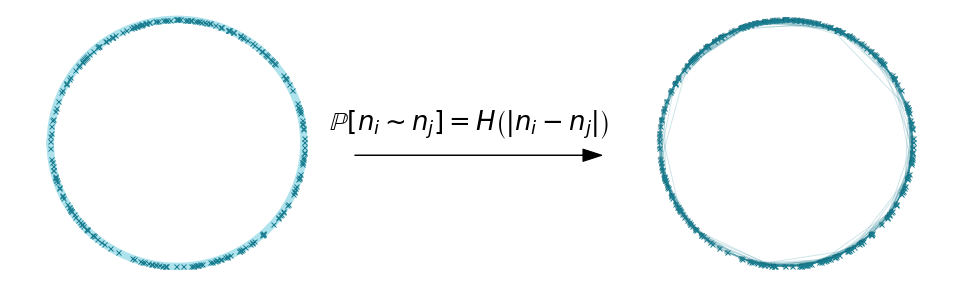

In [34]:
fig, ax = plt.subplots(figsize=(17,5))
ax.set_axis_off()

circle = np.linspace(-np.pi,np.pi,100)
x_circ, y_circ = np.cos(circle), np.sin(circle)

ax.plot(x_circ -ds, y_circ, color = back_col, linewidth = 7.5)
ax.plot(x_theta-ds, y_theta, 'x', color = node_col,markersize=5)

ax.arrow(-1,-0.1,1.8,0, head_width=0.1, fc='k', ec='k')
ax.annotate(r'$\mathbb{P}[n_i \sim n_j] = H \left(|n_i-n_j| \right)$', 
                 (-1.2,0.1), fontsize=26)

#ax.plot(x_circ +ds, y_circ, color = back_col, linewidth = 7.5)
ax.plot(x_theta+ds, y_theta, 'x', color = node_col,markersize=5)
rng.plot_nx(G, pos=pos, ax=ax, edge_colors = edge_col)

---

## Connection function $H$ has three parameters: $a, \eta, \rho$

![title](../../../awesome_meeting/diagram.pdf)

<br/>

---

## Paramter $\rho$ is regulating the density by assuring that 
$$\frac{2}{N(N-1)}\sum_{i<j}H\left(\vert n_i - n_j\vert\right) \approx \rho$$

In [37]:
RHO = 0.2

H = rng.connection_function(rho=RHO, eta=eta, kappa=kappa, a=a)

thetas = np.random.vonmises(mu=0, kappa=kappa, size=N)
x_theta, y_theta = np.cos(thetas), np.sin(thetas)
pos = dict(enumerate(zip(x_theta+1.5,y_theta)))

distances     = rng.geodesic_distances(thetas)
similarities  = rng.overlap(distances, a)/(2*np.pi*a)
probabilities = H(similarities)

R = np.random.uniform(size=round(N*(N-1)/2))
A = np.where(probabilities>R, 1, 0)
G = nx.from_numpy_array(squareform(A))

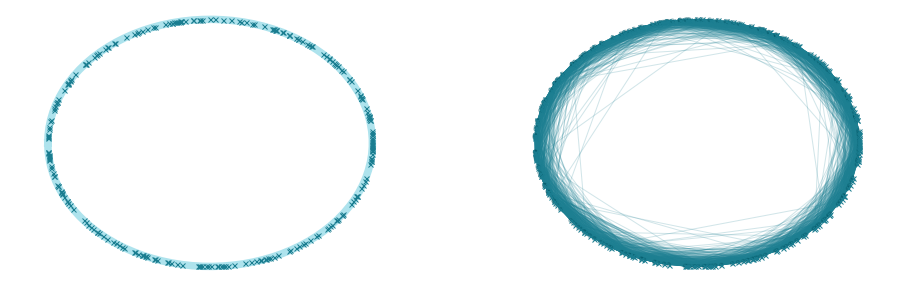

In [38]:
fig, ax = plt.subplots(figsize=(16,5))
ax.set_axis_off()

circle = np.linspace(-np.pi,np.pi,100)
x_circ, y_circ = np.cos(circle), np.sin(circle)

ax.plot(x_circ -1.5, y_circ, color = back_col, linewidth = 7.5)
ax.plot(x_theta-1.5, y_theta, 'x', color = node_col,markersize=5)

#ax.plot(x_circ +1.5, y_circ, color = back_col, linewidth = 7.5)
ax.plot(x_theta+1.5, y_theta, 'x', color = node_col,markersize=5)
rng.plot_nx(G, pos=pos, ax=ax, edge_colors = edge_col)

---

## Parameter $\kappa$ changes distribution along the circle

In [39]:
KAPPA = 1

H = rng.connection_function(rho=rho, eta=eta, kappa=KAPPA, a=a)

thetas = np.random.vonmises(mu=0, kappa=KAPPA, size=N)
x_theta, y_theta = np.cos(thetas), np.sin(thetas)
pos = dict(enumerate(zip(x_theta+1.5,y_theta)))

distances     = rng.geodesic_distances(thetas)
similarities  = rng.overlap(distances, a)/(2*np.pi*a)
probabilities = H(similarities)

R = np.random.uniform(size=round(N*(N-1)/2))
A = np.where(probabilities>R, 1, 0)
G = nx.from_numpy_array(squareform(A))

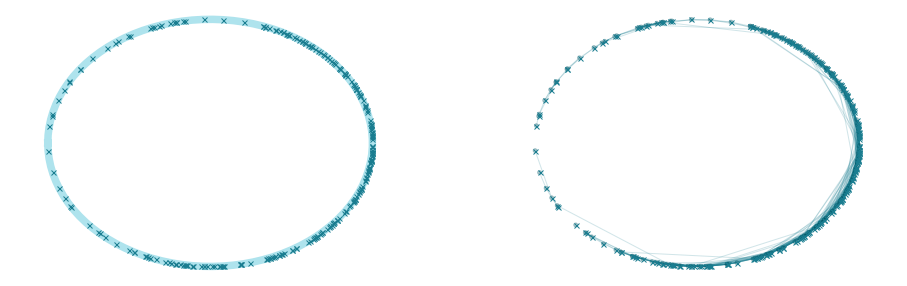

In [40]:
fig, ax = plt.subplots(figsize=(16,5))
ax.set_axis_off()

circle = np.linspace(-np.pi,np.pi,100)
x_circ, y_circ = np.cos(circle), np.sin(circle)

ax.plot(x_circ -1.5, y_circ, color = back_col, linewidth = 7.5)
ax.plot(x_theta-1.5, y_theta, 'x', color = node_col,markersize=5)

#ax.plot(x_circ +1.5, y_circ, color = back_col, linewidth = 7.5)
ax.plot(x_theta+1.5, y_theta, 'x', color = node_col,markersize=5)
rng.plot_nx(G, pos=pos, ax=ax, edge_colors = edge_col)

## Parameter $\eta$ regulates the "influence" of distances to the resulting probability

In [41]:
ETA = 1

H = rng.connection_function(rho=rho, eta=ETA, kappa=kappa, a=a)

thetas = np.random.vonmises(mu=0, kappa=kappa, size=N)
x_theta, y_theta = np.cos(thetas), np.sin(thetas)
pos = dict(enumerate(zip(x_theta+1.5,y_theta)))

distances     = rng.geodesic_distances(thetas)
similarities  = rng.overlap(distances, a)/(2*np.pi*a)
probabilities = H(similarities)

R = np.random.uniform(size=round(N*(N-1)/2))
A = np.where(probabilities>R, 1, 0)
G = nx.from_numpy_array(squareform(A))

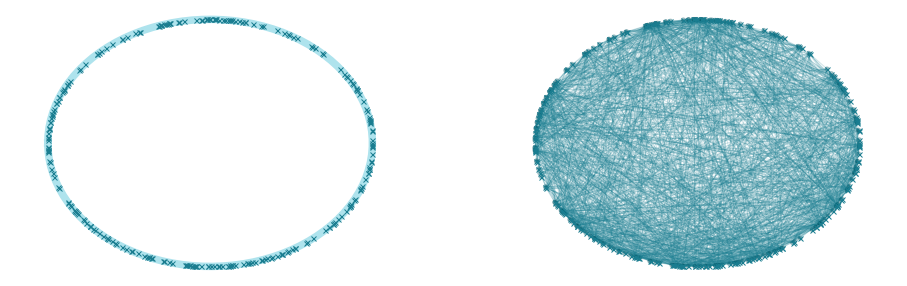

In [42]:
fig, ax = plt.subplots(figsize=(16,5))
ax.set_axis_off()

circle = np.linspace(-np.pi,np.pi,100)
x_circ, y_circ = np.cos(circle), np.sin(circle)

ax.plot(x_circ -1.5, y_circ, color = back_col, linewidth = 7.5)
ax.plot(x_theta-1.5, y_theta, 'x', color = node_col,markersize=5)

#ax.plot(x_circ +1.5, y_circ, color = back_col, linewidth = 7.5)
ax.plot(x_theta+1.5, y_theta, 'x', color = node_col,markersize=5)
rng.plot_nx(G, pos=pos, ax=ax, edge_colors = edge_col)

## Parameter $a$ changes the transition $\texttt{distance} \stackrel{s_a}{\longrightarrow} \texttt{similarity}$
 - for $a=0.5$ we have $\texttt{similarity} = 1- \frac{\texttt{distance}}{\pi}$
     
     
 - for $a<0.5$ there is a minimal probability $\texttt{prob}_{\min} > 0$ such that $F_{\eta,\rho}(0) = \texttt{prob}_{\min}$

In [65]:
A = 0.1

H = rng.connection_function(rho=rho, eta=eta, kappa=kappa, a=A)

thetas = np.random.vonmises(mu=0, kappa=kappa, size=N)
x_theta, y_theta = np.cos(thetas), np.sin(thetas)
pos = dict(enumerate(zip(x_theta+1.5,y_theta)))

distances     = rng.geodesic_distances(thetas)
similarities  = rng.overlap(distances, a)/(2*np.pi*a)
probabilities = H(similarities)

R = np.random.uniform(size=round(N*(N-1)/2))
A = np.where(probabilities>R, 1, 0)
G = nx.from_numpy_array(squareform(A))

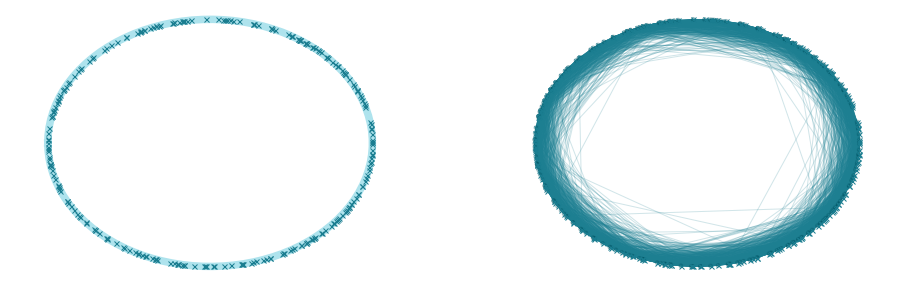

In [66]:
fig, ax = plt.subplots(figsize=(16,5))
ax.set_axis_off()

circle = np.linspace(-np.pi,np.pi,100)
x_circ, y_circ = np.cos(circle), np.sin(circle)

ax.plot(x_circ -1.5, y_circ, color = back_col, linewidth = 7.5)
ax.plot(x_theta-1.5, y_theta, 'x', color = node_col,markersize=5)

#ax.plot(x_circ +1.5, y_circ, color = back_col, linewidth = 7.5)
ax.plot(x_theta+1.5, y_theta, 'x', color = node_col,markersize=5)
rng.plot_nx(G, pos=pos, ax=ax, edge_colors = edge_col)

# Experiments

## randomness $\eta$ vs ring-score $\texttt{score}$

In [2]:
n_ensemble = 3
n_sample   = 10

N   = 900
rho = 0.05
eta = 0
a_list = [0.0625, 0.125, 0.25, 0.5]
kappas = np.linspace(0,1,3)

t1 = time.time()
for a,kappa in product(a_list,kappas):
    t2 = time.time()
    print(f"a={a:.3f}, kappa={kappa:.1f}, time={t2-t1:.2f}", end='\r')
    tmp = 0
    for i in range(n_ensemble):
        while True:
            G = rng.network_model(N, rho, a=a, eta=eta, kappa=kappa)
            if nx.is_connected(G):
                break
        tmp += rng.diagram(G).score
#    np.save(f"/Users/markusyoussef/Desktop/awesome_meeting/0_{a}_{kappa}_4.npy",
#            np.array(tmp/n_ensemble))

In [2]:
n_ensemble = 3
n_sample   = 10

N   = 900
rho = 0.05
a_list = [0.0625, 0.125, 0.25, 0.5]
kappas = np.linspace(0,1,3)

eta_arr = np.linspace(1,0,n_sample, endpoint=False)[::-1]
score_dic = {a:{kappa:np.zeros_like(eta_arr) 
              for kappa in kappas}
              for a in a_list}

t1 = time.time()
for a,kappa in product(a_list,kappas):
    for idx,eta in enumerate(eta_arr):
        t2 = time.time()
        print(f"a={a:.3f}, kappa={kappa:.1f}, eta={eta:.2f}, time={t2-t1:.2f}", end='\r')
        tmp = 0
        for i in range(n_ensemble):
            G = rng.network_model(N, rho, a=a, eta=eta, kappa=kappa)
            tmp += rng.diagram(G).score
        score_dic[a][kappa][idx] = tmp/n_ensemble
#    np.save(f"/Users/markusyoussef/Desktop/awesome_meeting/{a}_{kappa}_4.npy",
#            score_dic[a][kappa])

### Load results

In [16]:
n_ensemble = 3
n_sample   = 10

N   = 900
rho = 0.05
a_list = [0.0625, 0.125, 0.25, 0.5]
kappas = np.linspace(0,1,3)

eta_arr = np.linspace(0,1,n_sample+1)
score_dic = {a:{kappa:(np.hstack([1,
                       np.load(f"/Users/markusyoussef/Desktop/awesome_meeting/{a}_{kappa}.npy")]) +
                       np.hstack([1,
                       np.load(f"/Users/markusyoussef/Desktop/awesome_meeting/{a}_{kappa}_2.npy")]) +
                       np.hstack([1,
                       np.load(f"/Users/markusyoussef/Desktop/awesome_meeting/{a}_{kappa}_3.npy")]))/3
              for kappa in kappas}
              for a in a_list}

In [17]:
blues  = sns.color_palette('Blues', len(kappas))
reds   = sns.color_palette('Reds', len(kappas))
greens = sns.color_palette('Greens', len(kappas))
purples = sns.color_palette('Purples', len(kappas))

colors = [blues, reds, greens, purples]

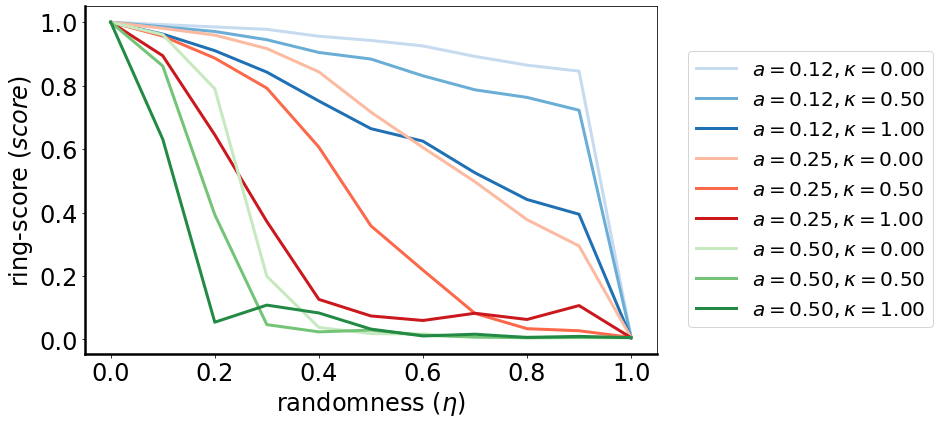

In [22]:
fix, ax = plt.subplots(figsize=(15,6))

a_list = [#0.0625, 
          0.125, 
          0.25, 
          0.5]
for idx_a, a in enumerate(a_list):
    for idx_kappa,kappa in enumerate(kappas):
        ax.plot(eta_arr, score_dic[a][kappa], 
                linewidth = 3, 
                label = rf'$a={a:.2f}, \kappa={kappa:.2f}$',
                color = colors[idx_a][idx_kappa])

ax.set_xlabel(r'randomness $(\eta)$', fontsize=24)
ax.set_ylabel(r'ring-score $(score)$', fontsize=24)

rng.ax_setup(ax)
plt.legend(fontsize=20, ncol=1, bbox_to_anchor=(1, 0.4, 0.5, 0.5))
plt.tight_layout()
plt.savefig("/Users/markusyoussef/Desktop/awesome_meeting/eta_va_score.png")
plt.savefig("/Users/markusyoussef/Desktop/awesome_meeting/eta_va_score.pdf")

## window size $a$ vs avg. clustering coefficient $c$

In [2]:
def avg_clustering(G):
    A = nx.to_scipy_sparse_matrix(G, format='lil')
    A.setdiag(0)
    A = scipy.sparse.csc_matrix(A)
    A2 = A@A
    o0 = A.sum(axis=1).A
    numer = A.multiply(A2).sum(axis=1).A

    D_denom = o0*o0 - o0

    C_D = np.true_divide(numer, D_denom,
                         out   = np.nan*np.empty_like(numer, dtype=float),
                         where = D_denom!=0).flatten()
    
    return np.nanmean(C_D)

In [3]:
n_ensemble = 3
n_sample   = 10

N   = 2**10
rho = 0.05
etas   = [0.00, 0.01, 0.10, 1.00]
kappas = np.linspace(0,2,3)

a_arr = np.linspace(0.5,0,n_sample, endpoint=False)[::-1]
c_dic = {eta:{kappa:np.zeros_like(a_arr) 
              for kappa in kappas}
              for eta in etas}

for eta,kappa in product(etas,kappas):
    for idx, a in enumerate(a_arr):
        print(f"{eta:.2f} : {a:.2f}", end='\r')
        tmp = 0
        for i in range(n_ensemble):
            G = rng.network_model(N, rho, a=a, eta=eta, kappa=kappa)
            tmp += avg_clustering(G)
        c_dic[eta][kappa][idx] = tmp/n_ensemble
            

In [4]:
blues  = sns.color_palette('Blues', len(kappas))
reds   = sns.color_palette('Reds', len(kappas))
greens = sns.color_palette('Greens', len(kappas))
purples = sns.color_palette('Purples', len(kappas))

colors = [blues, reds, greens, purples]

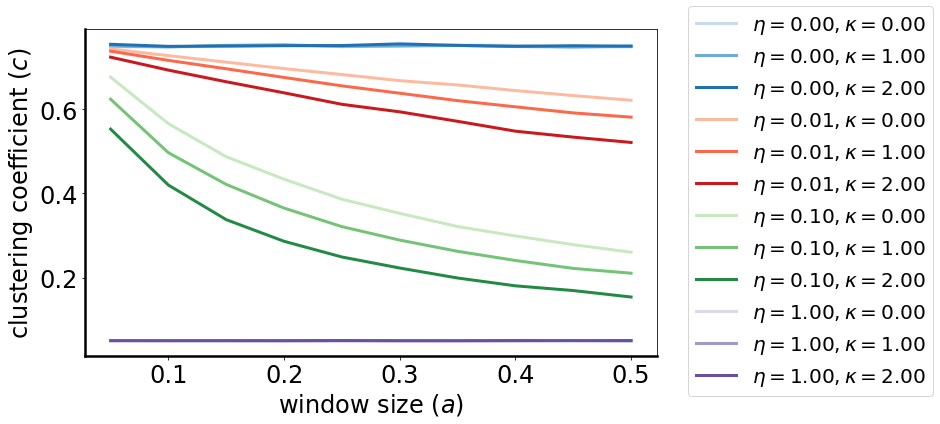

In [6]:
fix, ax = plt.subplots(figsize=(15,6))

for idx_eta, eta in enumerate(etas):
    for idx_kappa,kappa in enumerate(kappas):
        ax.plot(a_arr, c_dic[eta][kappa], 
                linewidth = 3, 
                label = rf'$\eta={eta:.2f}, \kappa={kappa:.2f}$',
                color = colors[idx_eta][idx_kappa])

ax.set_xlabel(r'window size $(a)$', fontsize=24)
ax.set_ylabel(r'clustering coefficient $(c)$', fontsize=24)

rng.ax_setup(ax)
plt.legend(fontsize=20, ncol=1, bbox_to_anchor=(1, 0.6, 0.5, 0.5))
plt.tight_layout()
plt.savefig("/Users/markusyoussef/Desktop/awesome_meeting/a_va_c.png")
plt.savefig("/Users/markusyoussef/Desktop/awesome_meeting/a_va_c.pdf")

## randomness $\eta$ vs spectrum gap $\texttt{spec}$

In [2]:
n_ensemble = 3
n_sample   = 10

N   = 2**10
rho = 0.05
a_list = [0.125, 0.25, 0.5]
kappas = np.linspace(0,1,3)

eta_arr = np.linspace(1,0,n_sample, endpoint=False)[::-1]
spec_dic = {a:{kappa:np.zeros_like(eta_arr) 
              for kappa in kappas}
              for a in a_list}

t1 = time.time()
for a,kappa in product(a_list,kappas):
    for idx,eta in enumerate(eta_arr):
        t2 = time.time()
        print(f"a={a:.3f}, kappa={kappa:.1f}, eta={eta:.2f}, time={t2-t1:.2f}", end='\r')
        tmp = 0
        for i in range(n_ensemble):
            G = rng.network_model(N, rho, a=a, eta=eta, kappa=kappa)
            tmp += nx.spectrum.normalized_laplacian_spectrum(G)[1]
        spec_dic[a][kappa][idx] = tmp/n_ensemble

In [3]:
blues  = sns.color_palette('Blues', len(kappas))
reds   = sns.color_palette('Reds', len(kappas))
greens = sns.color_palette('Greens', len(kappas))
purples = sns.color_palette('Purples', len(kappas))

colors = [blues, reds, greens, purples]

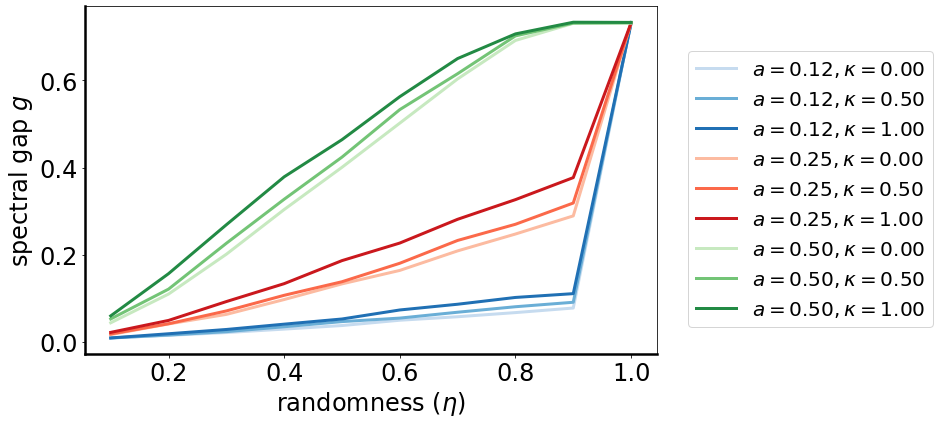

In [5]:
fix, ax = plt.subplots(figsize=(15,6))

a_list = [#0.0625, 
          0.125, 
          0.25, 
          0.5]
for idx_a, a in enumerate(a_list):
    for idx_kappa,kappa in enumerate(kappas):
        ax.plot(eta_arr, spec_dic[a][kappa], 
                linewidth = 3, 
                label = rf'$a={a:.2f}, \kappa={kappa:.2f}$',
                color = colors[idx_a][idx_kappa])

ax.set_xlabel(r'randomness $(\eta)$', fontsize=24)
ax.set_ylabel(r'spectral gap $g$', fontsize=24)

rng.ax_setup(ax)
plt.legend(fontsize=20, ncol=1, bbox_to_anchor=(1, 0.4, 0.5, 0.5))
plt.tight_layout()
plt.savefig("/Users/markusyoussef/Desktop/awesome_meeting/eta_va_spec.png")
plt.savefig("/Users/markusyoussef/Desktop/awesome_meeting/eta_va_spec.pdf")